## Assignment 4 : Ensembles & PCA
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References:
https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5
https://www.kaggle.com/sanikamal/xgboost-boston-housing-dataset
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d 

Description:
You will compete in the Kaggle.com Digit Recognizer competition which involves classical digit recognition from hand-written images. https://www.kaggle.com/c/digit-recognizer/. Dataset ( train.csv and test.csv ) can be found at https://www.kaggle.com/competitions/digit-recognizer/data

Read the competition rules, and download the MNIST training and test set data (data consist of 70,000 observations. Utilize the first 60,000 as a model development set and the final 10,000 as a holdout test set).This binary classification task is NOT what is required for the current assignment. In this assignment we are asking for a multiclass classifier. The entire MNIST data set will be used for input data. For this assignment, you will develop a classifier that may be used to predict which of the 10 digits is being written.

Note : 
The MNIST dataset consists of 60,000 training examples and 10,000 examples in the test set. It’s a good dataset for those who want to learn techniques and pattern recognition methods on real-world data without much effort in data-preprocessing.
Since the aim of this assignment is to learn the optimization methods to improve the accuracy of our classifier, we will re-group the dataset into 48,000 training examples and 28,000 test examples to reduce data available for training.


(1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data

(2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

(3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the test.csv data 

(4) The experiment proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen.

(5) Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 


Report total elapsed time measures for the training set analysis.  It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

start=datetime.now()
rf2.fit(trainimages,labels)
end=datetime.now()
print(end-start)

The purpose of this assignment is to assess the effectiveness of PCA.
2 types of muti-class classifier to predict which of the ten digits is being written　by using MNIST data set are to be developed for this assigment. One model is built by original MNIST data set, the other model is built by principle components as reduced explanatory variables.Elapsed time for each process are recorded and compared each other as benchmarking to assess effectiveness of applying PCA.

Relevant scikit-learn documentation includes:
- Random Forest Classifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Metrics Classification Report(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- Plot Digits Classification(https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)
- Sklearn Decomposition(https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

(Optional reading) If you want to learn about the time it takes to execute individual functions or code segments within Python, this article demonstrates a variety of ways to do it (https://www.sicara.ai/blog/2017-09-12-surgical-time-tracking-Python).

Regarding the F1 score and the evaluation of multiclass classifiers, refer to the literature on information retrieval. See pages 142–145 of this classic reference:
Manning, C. D., Raghaven, P., & Schutze, H. (2008). Introduction to information retrieval. Cambridge, UK: Cambridge University Press. [ISBN-13: 978-0521865715]

Or see pages 154–158 of the free online version of the book here (https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf). 

Additional information about this book is available online here (https://nlp.stanford.edu/IR-book/information-retrieval-book.html).

 
Programming Notes
One of the key parameters in setting up random forests is the number of explanatory variables to include in the individual trees. For this classification problem, I would suggest that we follow the advice of Müller and Guido (2017) and use max_features = 'sqrt' .

Regarding the other meta-parameters ...  ensure that bootstrap = True and, given the large number of observations, we might as well keep the default value of n_estimators = 10.

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O’Reilly. [ISBN-13: 978-1449369415]. Code examples here (https://github.com/amueller/introduction_to_ml_with_python.).

Another useful reference that discusses the MNIST data set and principal components analysis is:
VanderPlas, J. (2017). Python data science handbook: Essential tools for working with data. Sebastopol, CA: O’Reilly [ISBN-13: 978-1491912058]. Python code examples here (https://github.com/jakevdp/PythonDataScienceHandbook). 

 

Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

Optional (Audience:Business/C-Suite) - Additional 20 points
1. Provide a double-spaced paper with a two-page maximum for the text. The paper in pdf format should include 
    (1) Summary and problem definition for management; 
    (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) List assumptions, programming work, issues along with model evaluation metrics; and 
    (4) Review of results/ insight swith recommendations for management.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors so please make sure to updated all the cells based on best practices along with your analysis/findings.


GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points) 

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess
import pandas as pd
import seaborn as sns

#SKlearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report

In [3]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 85

In [4]:
# Get MNIST Data Set  ( https://github.com/ageron/handson-ml/issues/301#issuecomment-448853256 )
# The issue of obtaining MNIST data is solved by following "https://github.com/ageron/handson-ml/issues/143".
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

### Convert to df for later use

In [5]:
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df.shape

(70000, 784)

##### (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model development set of 60,000 observations. Record the time it takes to fit the model and evaluate the model on the holdout data. Assess classification performance using the F1 score, which is the harmonic mean of precision and recall.

In [6]:
#Split training data (60,000) and test data (10,000)
split = 60000
X_train, X_test = mnist["data"][:split], mnist["data"][split:]
y_train, y_test = mnist["target"][:split], mnist["target"][split:]

In [7]:
# Check the shape of the trainig data set array
print('Shape of X_train_data:', X_train.shape, X_test.shape)
print('Shape of y_train_data:', y_train.shape, y_test.shape)

Shape of X_train_data: (60000, 784) (10000, 784)
Shape of y_train_data: (60000,) (10000,)


## Update time.clock() to time.perf_counter(), as time.clock has been removed 

In [8]:
#RANDOM FOREST with MNIST data set (no PCA)
start_RF = time.perf_counter() #Record start time of RANDOM FOREST Process

RF_clf = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED
)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=10, random_state=85)

In [9]:
# Evaluate a score of RANDOM FOREST by cross-validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
print(cross_val_score(
  RF_clf, 
  X_test, y_test, 
  cv=10, 
  scoring='f1_macro'
))

[0.89769205 0.84517996 0.89344755 0.8767158  0.8778325  0.9304023
 0.91656575 0.92699056 0.95049895 0.9092583 ]


In [10]:
#Generate cross-validated estimates for each input data point
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred = cross_val_predict(
  RF_clf,
  X_test, y_test,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.98      0.96      1135
           2       0.89      0.91      0.90      1032
           3       0.85      0.90      0.87      1010
           4       0.88      0.92      0.90       982
           5       0.89      0.84      0.86       892
           6       0.93      0.92      0.93       958
           7       0.93      0.90      0.92      1028
           8       0.91      0.83      0.87       974
           9       0.90      0.85      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [11]:
# Calculate Average F1 Score
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
f1score_RF_clf = f1_score(y_test, y_pred, average='macro')
f1score_RF_clf

0.9027042584259733

In [12]:
#Elapsed Time to perform Random Forest
stop_RF = time.perf_counter()
time_RF = stop_RF - start_RF

print('Start time for Random Forest without PCA:', start_RF)
print('End_time for Random Forest without PCA:', stop_RF)
print('Runtime for Random Forest without PCA:', time_RF)

Start time for Random Forest without PCA: 32.3512379
End_time for Random Forest without PCA: 42.8471171
Runtime for Random Forest without PCA: 10.495879199999997


In [13]:
#Confusion Matrix for RANDOM FOREST with MNIST data set (no PCA)
cm_RF_clf = confusion_matrix(y_test, y_pred)
cm_RF_clf

array([[ 955,    1,    0,    2,    0,    6,    8,    2,    6,    0],
       [   0, 1117,    6,    2,    0,    2,    3,    0,    4,    1],
       [  15,    3,  937,   13,   15,    4,   15,   15,   10,    5],
       [   3,    6,   28,  905,    1,   23,    3,    8,   25,    8],
       [   3,    3,    7,    5,  905,    3,    9,    2,    6,   39],
       [  16,    8,    5,   69,    8,  745,   11,    6,   13,   11],
       [  16,    6,   13,    5,   10,   17,  882,    1,    8,    0],
       [   5,   16,   25,    7,   17,    2,    1,  927,    2,   26],
       [   5,   18,   27,   39,   13,   25,   14,   12,  811,   10],
       [  11,    8,    9,   17,   58,   13,    1,   22,   11,  859]],
      dtype=int64)

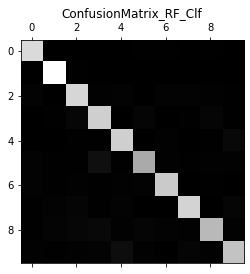

In [14]:
# Show Confusion Matrix Plot for RANDOM FOREST with MNIST data set (no PCA)
plt.matshow(cm_RF_clf, cmap=plt.cm.gray)
plt.title('ConfusionMatrix_RF_Clf')
plt.show()

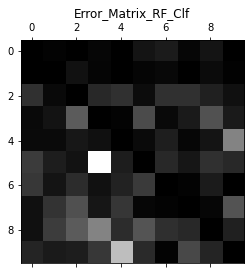

In [15]:
# Show Error Plot for RANDOM FOREST with MNIST data set (no PCA) 
rws = cm_RF_clf.sum(axis=1, keepdims=True)
norm = cm_RF_clf / rws

np.fill_diagonal(norm, 0)
plt.matshow(norm, cmap=plt.cm.gray)
plt.title('Error_Matrix_RF_Clf')
plt.show()

##### (2) Execute principal components analysis (PCA) on the full set of 70,000, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

Additional Resources for PCA Analysis: 
https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

### To apply PCA on the full set, we will re-combine X_train and X_test. We will also re-combine y_train and y_test to apply back to the dataset after pca has been implemented

In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
# Bind train and test features 
X = df.values

# Check shape to ensure we have all 70,000 records and 784 pixel variables 
print("X Shape:",X.shape)

X Shape: (70000, 784)


### Now we will begin to choose the number of principle components that represent 95% of the dataset. We will start by selecting all features for review

### Record how much time it takes to identify all principal components

### Apply/transform pca for all components 

In [18]:
pca_784 = PCA(n_components=X.shape[1], random_state=RANDOM_SEED)
pca_784.fit(X)
df_pca_784 = pca_784.transform(X)

### As expected, this explains 100% of the variance

In [19]:
print("Variance explained by all 784 principal components =", sum(pca_784.explained_variance_ratio_ * 100))

Variance explained by all 784 principal components = 100.00000000000006


### The following array shows how the amount of variance explained increases as we introduce each additional component 

In [20]:
np.cumsum(pca_784.explained_variance_ratio_ * 100)

array([  9.74611592,  16.90156051,  23.05109149,  28.45447602,
        33.34340972,  37.64863675,  40.92689828,  43.81653984,
        46.57490404,  48.91704421,  51.02373276,  53.061286  ,
        54.76835031,  56.46237009,  58.04575233,  59.53209723,
        60.85145572,  62.13046998,  63.31774246,  64.47067917,
        65.53671895,  66.54651329,  67.50566452,  68.4152996 ,
        69.29858642,  70.13740462,  70.94723642,  71.73295432,
        72.47321655,  73.16323071,  73.8193747 ,  74.46484499,
        75.06566429,  75.65127604,  76.2180296 ,  76.76150026,
        77.26621733,  77.75329675,  78.23225188,  78.69984553,
        79.15421416,  79.59913217,  80.01734877,  80.41351268,
        80.79722042,  81.17300523,  81.53443151,  81.88345611,
        82.22218771,  82.54188388,  82.85873791,  83.16888282,
        83.46536318,  83.75246462,  84.03497842,  84.30440113,
        84.57279344,  84.82930277,  85.08247063,  85.32711866,
        85.56682089,  85.8054019 ,  86.03463564,  86.25

### Looking at a plot of the explained variance by component, we can see that we reach the 95% threshold somewhere around the 150 components range

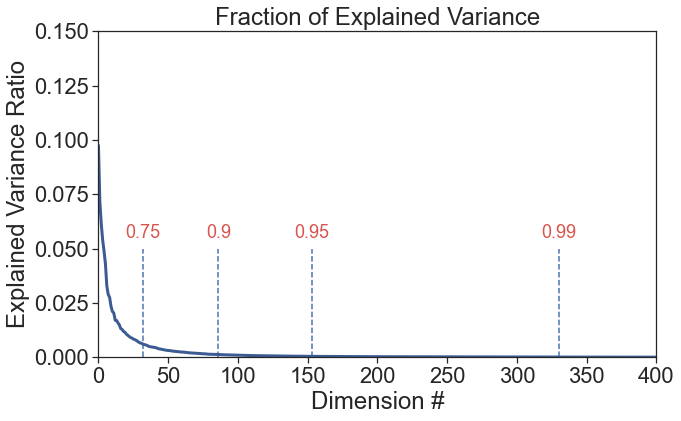

<Figure size 432x288 with 0 Axes>

In [21]:
# We compute the cumulaive variance
lmts = [0.75, 0.9, 0.95, 0.99]
vars = np.cumsum(pca_784.explained_variance_ratio_)
vls = np.array([np.argmax(vars > i) for i in lmts])

# Make the plot
sns.set(style="ticks", font_scale=2.0)
fig, ax = plt.subplots(figsize=(10,6))

# Decorate the plot
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')

ax.set_xlim(0, 400.0)
ax.set_ylim(0, 0.15)

# Draw lines for the cumulative variance
ax.vlines(vls, 0.0, 0.05, linestyles='dashed') #colors=sns.xkcd_rgb)
for xl, txt in zip(vls, lmts):
    ax.text(xl, 0.055, str(txt), fontsize = 18, \
            color=sns.xkcd_rgb["pale red"], \
            horizontalalignment='center')
    
# Now draw the points, with bolder colors.
plt.plot(pca_784.explained_variance_ratio_, color=sns.xkcd_rgb["denim blue"], linewidth=3)

plt.show()
sns.despine(offset=5, trim=True)

### To capture 95% of the explained variance, let's set n_components to 0.95

In [22]:
pca_95 = PCA(n_components=0.95, random_state=RANDOM_SEED)
pca_95.fit(X)
X_pca_95 = pca_95.transform(X)

### Let's see how much time it takes to identify 95% of the variance and compare against identifying all components. Surprisingly, the amount of time to identify 95% of the variance is quite similar to identifying all components!

In [23]:
%%time
pca_95.fit(X)

Wall time: 3.82 s


PCA(n_components=0.95, random_state=85)

In [24]:
%%time
pca_784.fit(X)

Wall time: 3.97 s


PCA(n_components=784, random_state=85)

### We can see that 154 components will provide us with 95% of the explained variance 

In [25]:
X_pca_95.shape

(70000, 154)

### Let's now take our components explaining 95% of the variance and add back in the labels to use for our random forrest classifier 

In [26]:
df_new = pd.DataFrame(X_pca_95)
df_new['label'] = mnist.target

In [27]:
df_new.shape

(70000, 155)

##### (3) Using the identified principal components from step (2), use the first 60,000 observations to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the holdout data (the last 10,000 observations). Assess classification performance using the F1 score, which is the harmonic mean of precision and recall.

### Split df_new with the principal components based on the instructions (48,000 training records, 22,000 testing records)

In [28]:
X = df_new.iloc[:, 0:153]
y = df_new.iloc[:, 154]
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(X, y, test_size = 10000, random_state=RANDOM_SEED)

# check split of data
len(x_trainPCA), len(y_trainPCA), len(x_testPCA), len(y_testPCA), len(df_new)

(60000, 60000, 10000, 10000, 70000)

### Establish Random Forest Classifier and fit on PCA data. We also start the timer for the time it takes to fit the model and to evaluate the model on the holdout data (the last 22,000 observations) here

In [29]:
#RANDOM FOREST with PCA MNIST data set 
start_RF_PCA = time.perf_counter() #Record start time of RANDOM FOREST Process that uses PCA Data

RF_clf_pca = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED
)
RF_clf.fit(x_trainPCA, y_trainPCA)

RandomForestClassifier(max_features='sqrt', n_estimators=10, random_state=85)

### Reveiw CV components

In [30]:
print(cross_val_score(
  RF_clf_pca, 
  x_testPCA, y_testPCA, 
  cv=10, 
  scoring='f1_macro'
))

[0.82275374 0.82626755 0.80292182 0.81972106 0.82335776 0.83810926
 0.80116272 0.8434256  0.80710822 0.79824766]


### Generate cross-validated estimates for each input data point 

In [31]:
#Generate cross-validated estimates for each input data point
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred_pca = cross_val_predict(
  RF_clf_pca,
  x_testPCA, y_testPCA,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_testPCA, y_pred_pca))

              precision    recall  f1-score   support

           0       0.80      0.91      0.86       940
           1       0.94      0.98      0.96      1079
           2       0.76      0.84      0.80       970
           3       0.73      0.79      0.76      1003
           4       0.80      0.83      0.81      1009
           5       0.76      0.71      0.74       943
           6       0.89      0.88      0.88      1020
           7       0.87      0.85      0.86      1029
           8       0.83      0.68      0.75       995
           9       0.83      0.72      0.77      1012

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



### We can see that the average F1 score is slightly lower than the classifier using all components, which is to be expected

In [32]:
# Calculate Average F1 Score
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
f1score_RF_clf_pca = f1_score(y_testPCA, y_pred_pca, average='macro')
f1score_RF_clf_pca

0.8184772893086836

### Stop the clock for performance time here. The code matches the code in step 1 here to ensure there are not discrepancies in the processing time 

In [33]:
#Elapsed Time to perform Random Forest
stop_RF_PCA = time.perf_counter()
time_RF_PCA = stop_RF_PCA - start_RF_PCA

print('Start time for Random Forest with PCA:', start_RF_PCA)
print('End_time for Random Forest with PCA:', stop_RF_PCA)
print('Runtime for Random Forest with PCA:', time_RF_PCA)

Start time for Random Forest with PCA: 59.5384527
End_time for Random Forest with PCA: 79.6665776
Runtime for Random Forest with PCA: 20.128124899999996


##### (4) Compare test set performance across the two modeling approaches: original 784-variable model versus the 95-percent-PCA model. Also evaluate the time required to perform (1) versus the time required to perform (2) and (3) together. Ensure that accurate measures are made of the total time it takes to execute each of the modeling approaches in training the models.

### Comparrison of the the Average F1 Score  for the original 784-variable model versus the 95-percent-PCA model. 

### As we can see below, the 784-variable model outperforms the PCA model by about 8%. We would expect a higher F1 score from the 784-variable model given the reduction in components 

In [34]:
print("Average F1 score using the original 784-variable model:", f1score_RF_clf)
print("Average F1 score using the 95-percent-PCA model:", f1score_RF_clf_pca)

Average F1 score using the original 784-variable model: 0.9027042584259733
Average F1 score using the 95-percent-PCA model: 0.8184772893086836


### Comparrison of the the runtime for the original 784-variable model versus the 95-percent-PCA model. The time comparrision was run over the same code snippets, with the only difference being the model being employed (PCA and Non-PCA)

### Surprisingly, we see that the runtime for the PCA model is significantly slower than the 784-variable model. We would expect the CPA model to have a quicker runtime given the dimmension reduction

In [35]:
print('Runtime for Random Forest with 784-variable model:', time_RF)
print('Runtime for Random Forest with PCA:', time_RF_PCA)

Runtime for Random Forest with 784-variable model: 10.495879199999997
Runtime for Random Forest with PCA: 20.128124899999996


##### (5) The experiment we have proposed has a design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen.

### The flaw with the design is that we should employ PCA on only the train dataset, not the entire dataset. To fix this, we will split the dataset into train/test, then employ PCA on only the train set, and compare perforamance again

### Create new Feature and Label Variables

In [36]:
# Get features from original dataset into new X variable
X1 = df.values

# Check shape to ensure we have all 70,000 records and 784 pixel variables 
print("X1 Shape:",X1.shape)

# Get labels from original dataset into new y variable
y1 = mnist.target
print("y1 Shape:",y1.shape)

X1 Shape: (70000, 784)
y1 Shape: (70000,)


### Split Features and Labels into Test/Train Datasets

In [37]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 10000, random_state=RANDOM_SEED)

# check split of data
len(x_train1), len(y_train1), len(x_test1), len(y_test1), len(df)

(60000, 60000, 10000, 10000, 70000)

### Apply PCA to Train Dataset ONLY using our pca_95 variable that was previously used on the entire dataset

In [38]:
pca_95.fit(x_train1)
X_pca_95_trainOnly = pca_95.transform(x_train1)

### We can see that the new PCA dataset has 154 components, but only includes the 48,000 records that are indicated in the training split

In [39]:
X_pca_95_trainOnly.shape

(60000, 154)

### Now we will apply the Random Forest Classifier to the training dataset with the applied PCA feature reduction 

In [40]:
#RANDOM FOREST with PCA MNIST data set 
start_RF_PCA_Adjusted = time.perf_counter() #Record start time of RANDOM FOREST Process that uses PCA Data

RF_clf_pca_adjusted = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED
)
RF_clf_pca_adjusted.fit(X_pca_95_trainOnly, y_train1)

RandomForestClassifier(max_features='sqrt', n_estimators=10, random_state=85)

### Review CV components. NOTE: This looks at the test set, which will not include the PCA dimmension reduction we incorporated on the training dataset

In [41]:
print(cross_val_score(
  RF_clf_pca_adjusted, 
  x_test1, y_test1, 
  cv=10, 
  scoring='f1_macro'
))

[0.90175264 0.90354636 0.89834293 0.90580737 0.92729018 0.92211225
 0.90107332 0.90308681 0.89797438 0.90091944]


### Generate cross-validated estimates for each input data point

In [42]:
#Generate cross-validated estimates for each input data point
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred_pca_adjusted = cross_val_predict(
  RF_clf_pca_adjusted,
  x_test1, y_test1,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test1, y_pred_pca_adjusted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       940
           1       0.94      0.98      0.96      1079
           2       0.89      0.92      0.90       970
           3       0.88      0.87      0.87      1003
           4       0.89      0.91      0.90      1009
           5       0.88      0.86      0.87       943
           6       0.95      0.93      0.94      1020
           7       0.92      0.93      0.92      1029
           8       0.90      0.83      0.86       995
           9       0.89      0.87      0.88      1012

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Review average F1 score on adjusted pca dataset that only applies PCA to training data. We can see, now that we have only applied PCA to the training data, the average F1 score is much better!

In [43]:
# Calculate Average F1 Score
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
f1score_RF_clf_pca_adjusted = f1_score(y_test1, y_pred_pca_adjusted, average='macro')
f1score_RF_clf_pca_adjusted

0.9062433692847657

### Stop the clock for performance time here. The code matches the code in step 1 and step 3 here to ensure there are not discrepancies in the processing time

In [44]:
#Elapsed Time to perform Random Forest
stop_RF_PCA_Adjusted = time.perf_counter()
time_RF_PCA_Adjusted = stop_RF_PCA_Adjusted - start_RF_PCA_Adjusted

print('Start time for Random Forest with Adjusted Training Data PCA:', start_RF_PCA_Adjusted)
print('End_time for Random Forest with Adjusted Training Data PCA:', stop_RF_PCA_Adjusted)
print('Runtime for Random Forest with Adjusted Training Data PCA:', time_RF_PCA_Adjusted)

Start time for Random Forest with Adjusted Training Data PCA: 84.4921449
End_time for Random Forest with Adjusted Training Data PCA: 97.8629737
Runtime for Random Forest with Adjusted Training Data PCA: 13.370828799999998


### Compare the Runtime Outputs for the full 784-variable model and the Adjusted PCA Model that only applies PCA to the training dataset. We now see that the PCA model has a quicker run-time than the 784-Variable model. 

In [45]:
print('Runtime for Random Forest with Adjusted Training Data PCA:', time_RF_PCA_Adjusted)
print('Runtime for Random Forest with 784-variable model:', time_RF)

Runtime for Random Forest with Adjusted Training Data PCA: 13.370828799999998
Runtime for Random Forest with 784-variable model: 10.495879199999997


### Compare the average F1 score for the full 784-variable model and the Adjusted PCA Model that only applies PCA to the training dataset. We see now that the PCA model is only slightly lower on the F1 score than the 784-variable model.

In [46]:
print("Average F1 score using the 95-percent-PCA model:", f1score_RF_clf_pca_adjusted)
print("Average F1 score using the original 784-variable model:", f1score_RF_clf)

Average F1 score using the 95-percent-PCA model: 0.9062433692847657
Average F1 score using the original 784-variable model: 0.9027042584259733


Management Problem:
From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.


#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.

### (1) A summary and problem definition for management:

The goal of this analysis is to train a model that can accurately identify hand-written numbers. We want to do this as accurately and quickly as possible. To do this, we will review accuracy and timing scores between a model using all pixel variables in the dataset and a model that employs Principal Component Analysis (PCA) to reduce the number of dimmensions we look at. After reviewing accuracy and timing associated with the regular and PCA model, we can determine which model to use.

### (2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed

We begin analysis by loading the data and fitting a Random Forest Classifier model to all associated variables (784 variables) in the dataset. As indicated in the instructions, we are focussing on the F1 score for our outcome metric of interest, therefore we look at the average F1 score along with the amount of time it took the model to fit and apply to the entire dataset. We then apply PCA to the entire dataset and fit/score a new model using the PCA data. We find that the F1 score goes down (to be expected) and the time it takes to fit and apply the model increases (not to be expected). 

The reason the F1 score goes significantly down and the processing time increases is because we have applied PCA to the entire dataset. Instead, we should only be applying PCA to our training data. After we develop a new model where we only apply PCA to the training data, we see a revised F1 score that is much closer to the F1 score for the model using the entire variable set. We also see that the processing time is now significantly faster for the adjusted PCA model.

### (3) Overview of programming work

Primary programming work centered around the development and adjustment of PCA introduction to the dataset. This involved applying PCA, determining the amount of components requried to reach the 95% threshold, running the original PCA model that used PCA on the entire dataset and then the adjusted PCA model that only applies PCA to the training data. Additional programming work involved outputting the metrics of interest (time it takes to fit/apply each model and F1 scoring outputs in this case). 

### (4) Review of results with recommendations for management.

Management Problem:
From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.

Answer:
After correctly applying PCA to the trianing data, we can see that we achieve a F1 score that is very similar to the model employing the 784-variables. We also see that the adjusted PCA model has a similar run-time than the full 784-variable model. 

Because of the similar F1 scoring and the associated run-time, I would recommend using the PCA model moving forward. This is primarly because the PCA model will scale much more efficiently as you begin to introduce more data into the model. 